<summary>Table of Contents</summary>

- [1. Comparison of Scalers and Loss Functions](#1-comparison-of-scalers-and-loss-functions)
- [2. Standard Scaler Informer plots](#2-standard-scaler-informer-plots)
- [3. Standard Scaler PatchTST plots](#3-standard-scaler-patchtst-plots)
- [4. MinMax Informer plots](#4-minmax-informer-plots)
- [5. MinMax PatchTST plots](#5-minmax-patchtst-plots)


In this notebook we show results of the previous notebook to be able to compare loss functions and scalers for Italy dataset. In addition, we plot true values and predictions to see their distributions for each loss function and prediction length.

In [1]:
import shutil
import pandas as pd
from utils.error_analysis import plot_error_results

# 1. Comparison of Scalers and Loss Functions

In [ ]:
# Load the data and keep important columns
standard_informer = pd.read_csv('./results/loss_fnc_choice/informer_loss_functions_results_unscaled_IT_default.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
standard_patchtst = pd.read_csv('./results/loss_fnc_choice/patchtst_loss_functions_results_unscaled_IT_default.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

minmax_informer = pd.read_csv('./results/loss_fnc_choice/informer_loss_functions_results_unscaled_minmax_IT_default.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
minmax_patchtst = pd.read_csv('./results/loss_fnc_choice/patchtst_loss_functions_results_unscaled_minmax_IT_default.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

# Set 'Pred_len' and 'Loss_function' as index for each dataframe
standard_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
standard_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

minmax_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
minmax_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

# Concatenate all results
informer_df = pd.concat([
    standard_informer, 
    minmax_informer, 
], axis=1)

patchtst_df = pd.concat([
    standard_patchtst, 
    minmax_patchtst, 
], axis=1)

# Define the scalers and metrics
scalers = ['Standard', 'MinMax']
metrics = ['RMSE', 'MAE']

# Create the MultiIndex for columns
multi_index_columns = pd.MultiIndex.from_product([scalers, metrics], names=['Scaler', 'Metrics'])

# Assign the MultiIndex to dataframes
informer_df.columns = multi_index_columns
patchtst_df.columns = multi_index_columns

# Groupby iterations
informer_df = informer_df.groupby(['Pred_len', 'Loss_function']).mean()
patchtst_df = patchtst_df.groupby(['Pred_len', 'Loss_function']).mean()

# Round for better readability
informer_df = informer_df.round(2)
patchtst_df = patchtst_df.round(2)

In [3]:
informer_df

Scaler                 Standard            MinMax         
Metrics                    RMSE      MAE     RMSE      MAE
Pred_len Loss_function                                    
24       MAE            1299.21   804.82  1366.10   835.65
         MSE            1443.40   941.36  1369.82   883.76
96       MAE            1915.71  1212.00  1818.26  1167.63
         MSE            1917.33  1277.98  1953.06  1289.98
168      MAE            2071.48  1316.93  2177.93  1386.11
         MSE            2103.30  1407.85  2141.51  1396.59

In [4]:
patchtst_df

Scaler                 Standard            MinMax         
Metrics                    RMSE      MAE     RMSE      MAE
Pred_len Loss_function                                    
24       MAE            1073.61   668.26  1066.73   655.44
         MSE            1091.69   711.64  1100.62   702.07
96       MAE            1545.87   981.32  1537.08   970.01
         MSE            1609.84  1076.59  1621.62  1056.89
168      MAE            1711.28  1093.87  1718.05  1089.09
         MSE            1765.80  1183.54  1771.14  1157.65

# 2. Standard Scaler Informer plots
We plot unscaled data for each column.

The more the line is narrow and corresponds to the 45 degree line and symmetric around it - the better. Please note that we observe such patterns because of original shapes of distributions within our data. 


Dark spots mean more observations.

load actual          min value: 15334.00   max value: 50338.35   negative values:       0.00%
solar generation     min value: -451.01    max value: 11389.00   negative values:      37.28%
wind onshore         min value: -42.74     max value: 7448.00    negative values:       0.01%


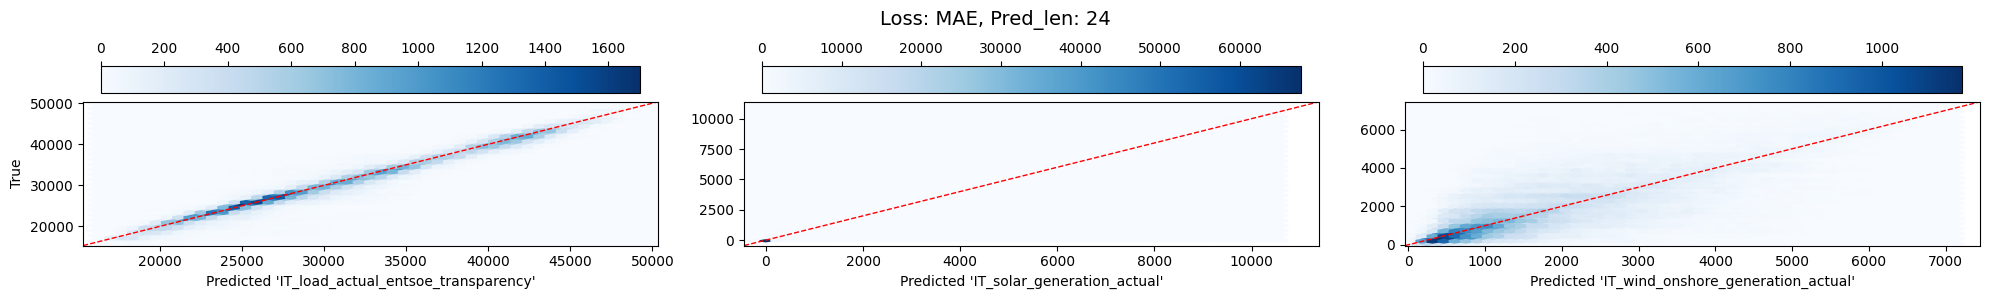

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1029.19   max value: 11389.00   negative values:      18.94%
wind onshore         min value: -335.42    max value: 7448.00    negative values:       0.17%


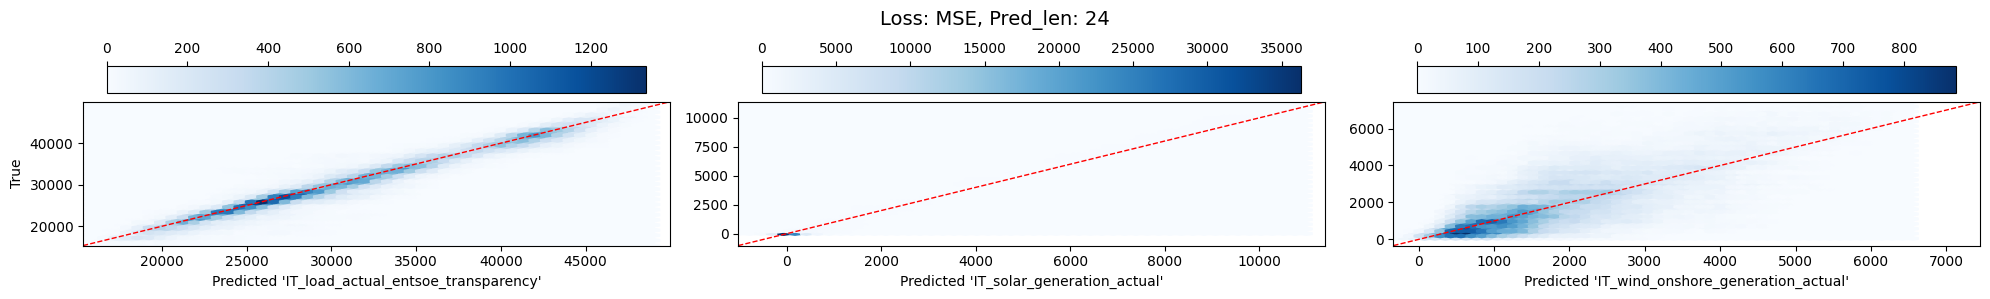

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -608.95    max value: 11389.00   negative values:      27.39%
wind onshore         min value: -74.45     max value: 7448.00    negative values:       0.00%


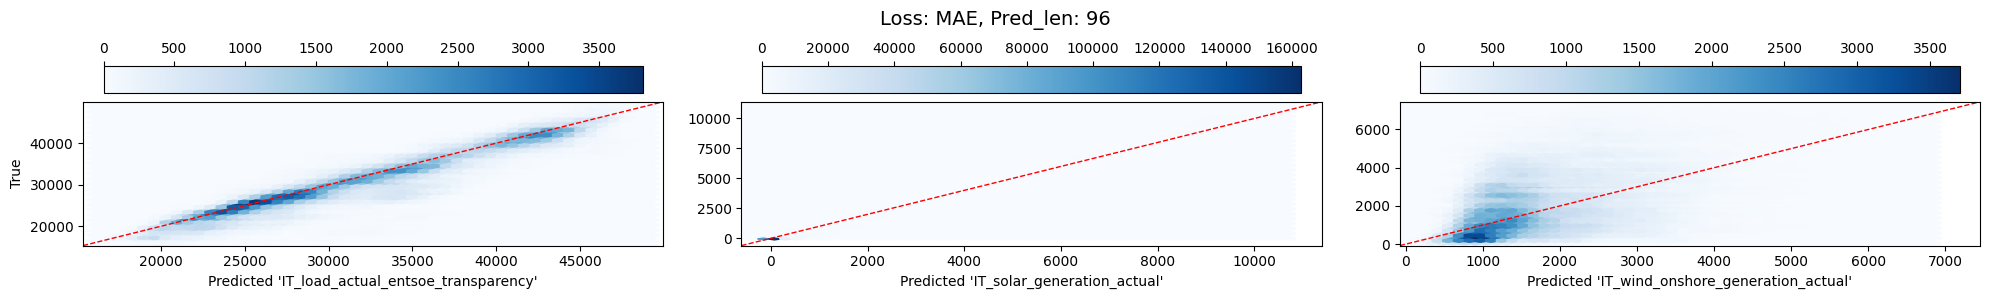

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1317.13   max value: 11389.00   negative values:      27.54%
wind onshore         min value: -48.76     max value: 7448.00    negative values:       0.00%


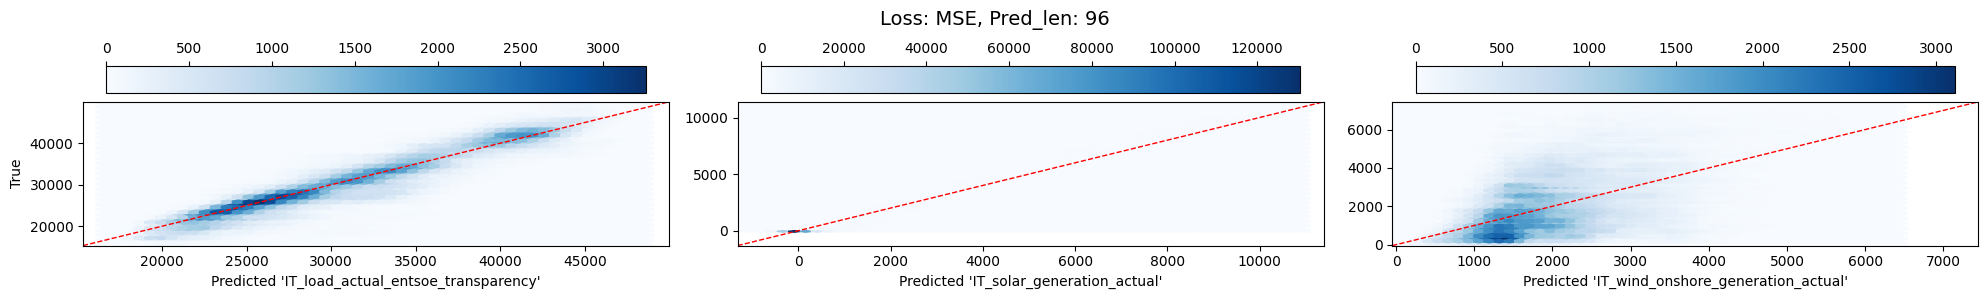

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 50075.21   negative values:       0.00%
solar generation     min value: -466.29    max value: 11389.00   negative values:      39.11%
wind onshore         min value: -307.43    max value: 7448.00    negative values:       0.01%


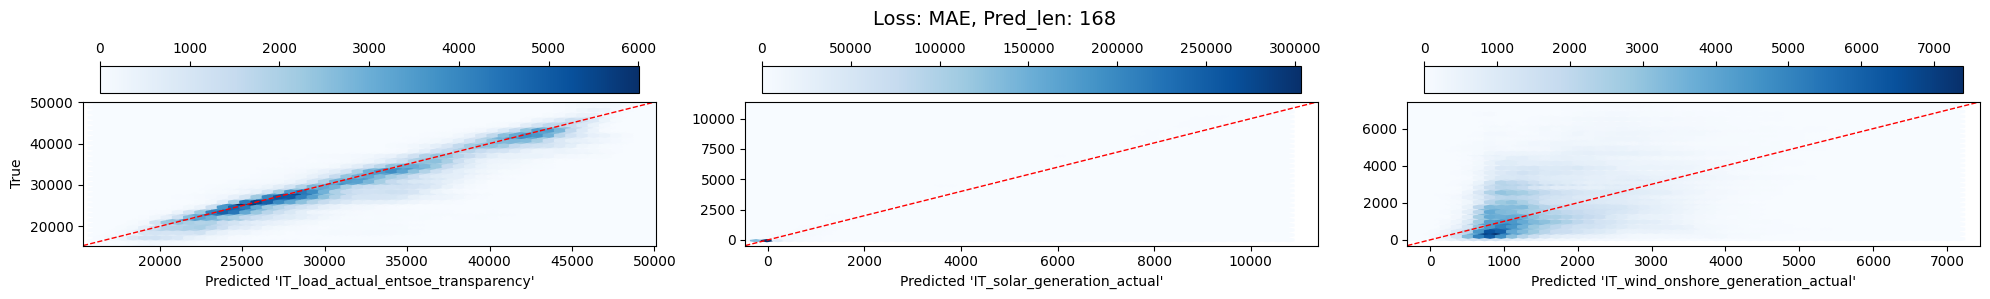

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1007.91   max value: 11389.00   negative values:      23.45%
wind onshore         min value: -331.39    max value: 7448.00    negative values:       0.01%


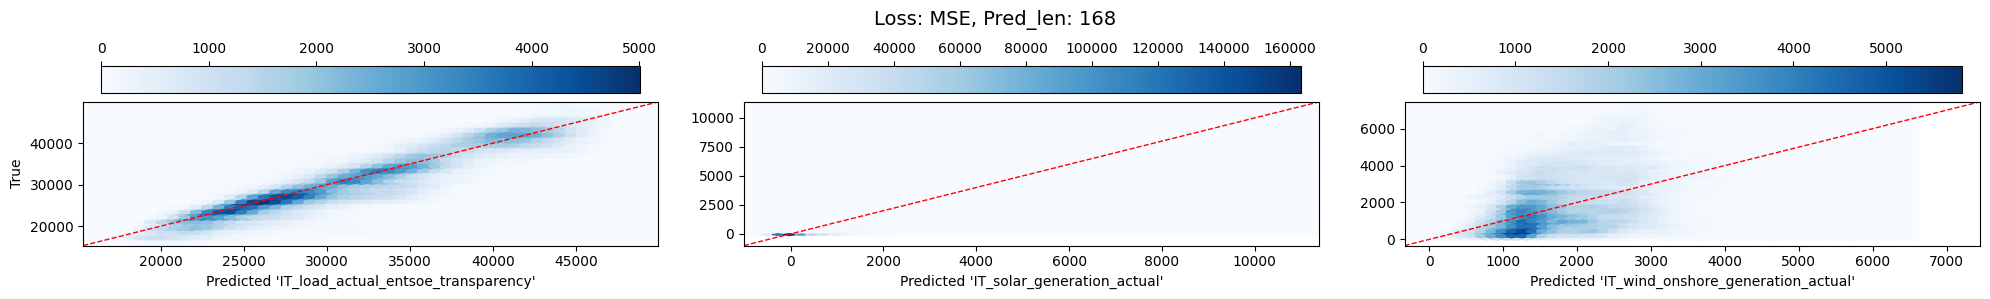

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [5]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled_IT", dataset="IT")
    print("-"*160)

# 3. Standard Scaler PatchTST plots

load actual          min value: 14819.40   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1133.43   max value: 11389.00   negative values:      22.98%
wind onshore         min value: -391.86    max value: 7448.00    negative values:       0.12%


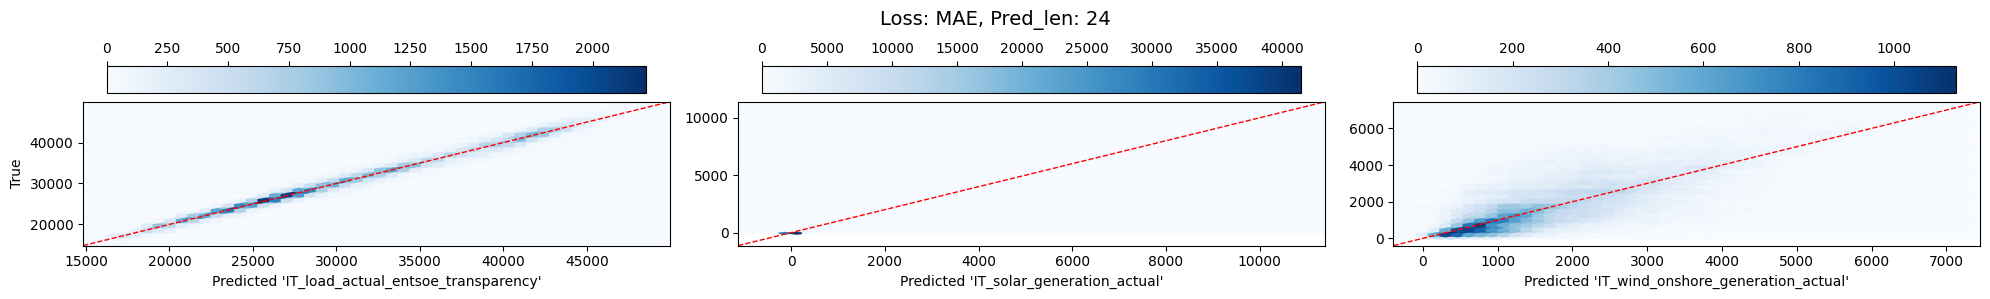

load actual          min value: 13974.52   max value: 50156.27   negative values:       0.00%
solar generation     min value: -1906.19   max value: 11389.00   negative values:      24.12%
wind onshore         min value: -399.59    max value: 7448.00    negative values:       0.13%


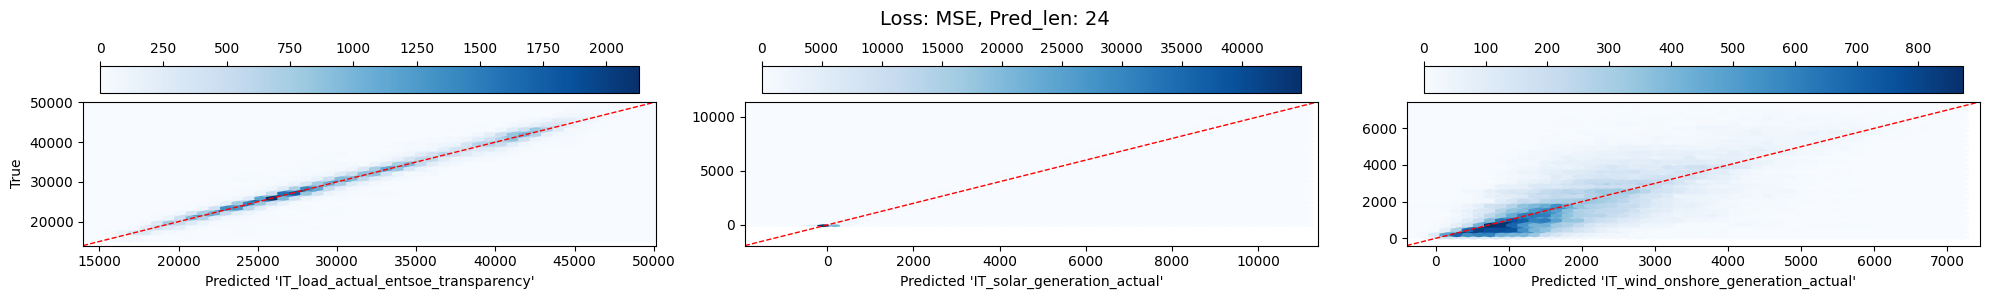

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15069.02   max value: 50185.09   negative values:       0.00%
solar generation     min value: -1639.01   max value: 11389.00   negative values:      32.89%
wind onshore         min value: -455.08    max value: 7448.00    negative values:       0.07%


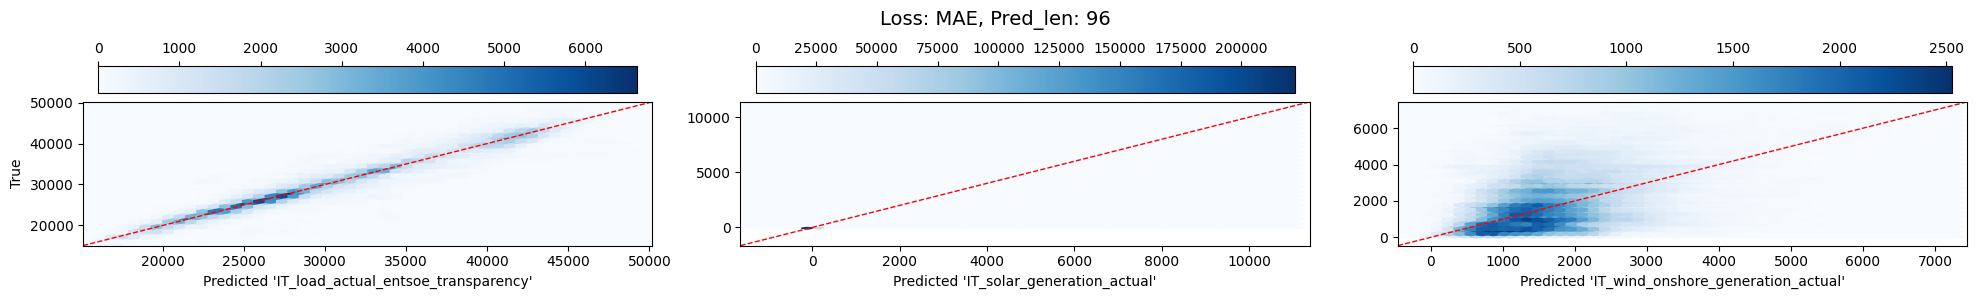

load actual          min value: 14498.06   max value: 49964.00   negative values:       0.00%
solar generation     min value: -2881.39   max value: 11389.00   negative values:      18.92%
wind onshore         min value: -397.42    max value: 7448.00    negative values:       0.03%


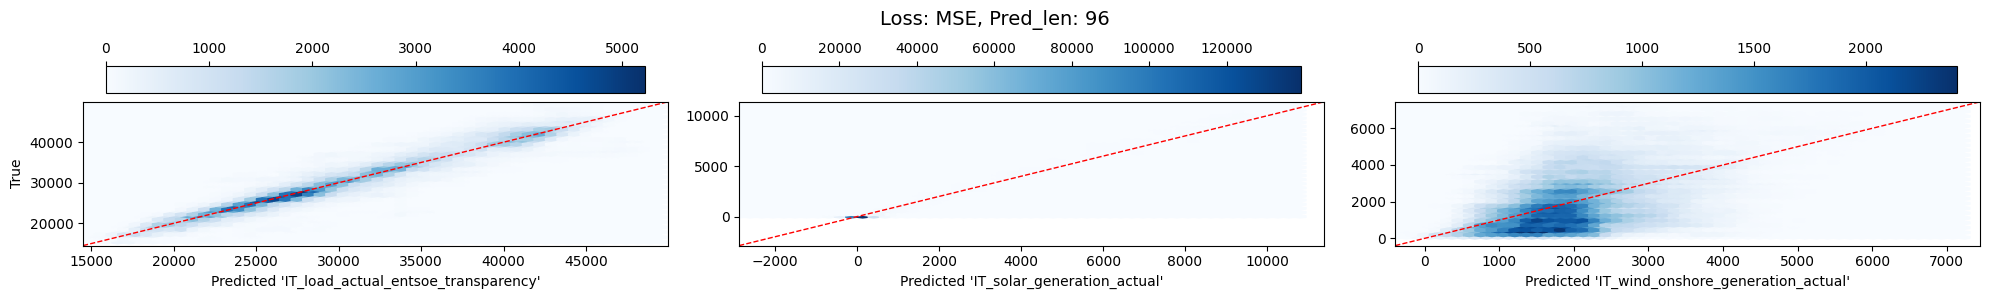

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 14722.20   max value: 50003.25   negative values:       0.00%
solar generation     min value: -1737.75   max value: 11389.00   negative values:      24.36%
wind onshore         min value: -294.47    max value: 7448.00    negative values:       0.07%


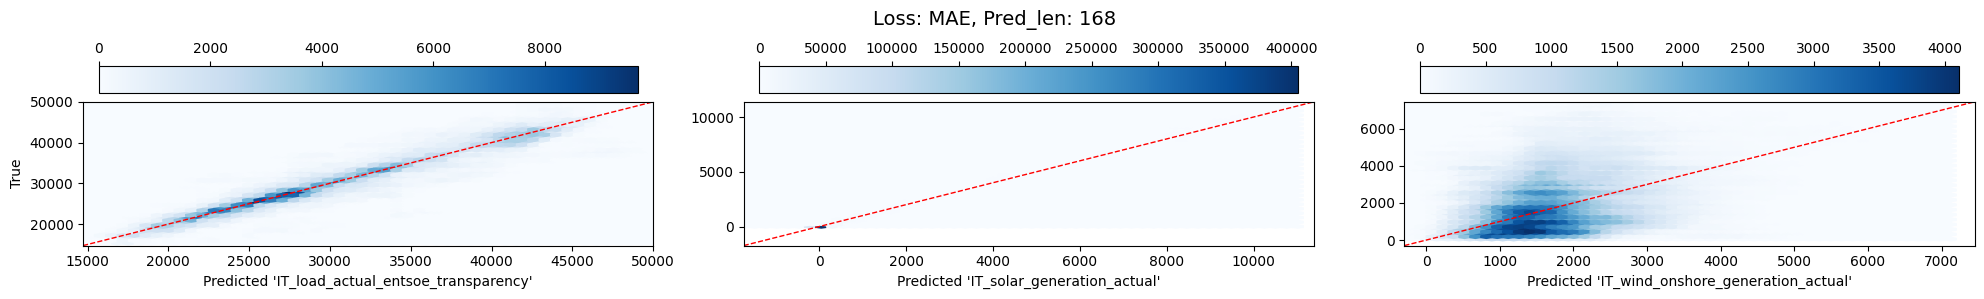

load actual          min value: 14023.68   max value: 49964.00   negative values:       0.00%
solar generation     min value: -3128.24   max value: 11389.00   negative values:      22.04%
wind onshore         min value: -332.01    max value: 7448.00    negative values:       0.01%


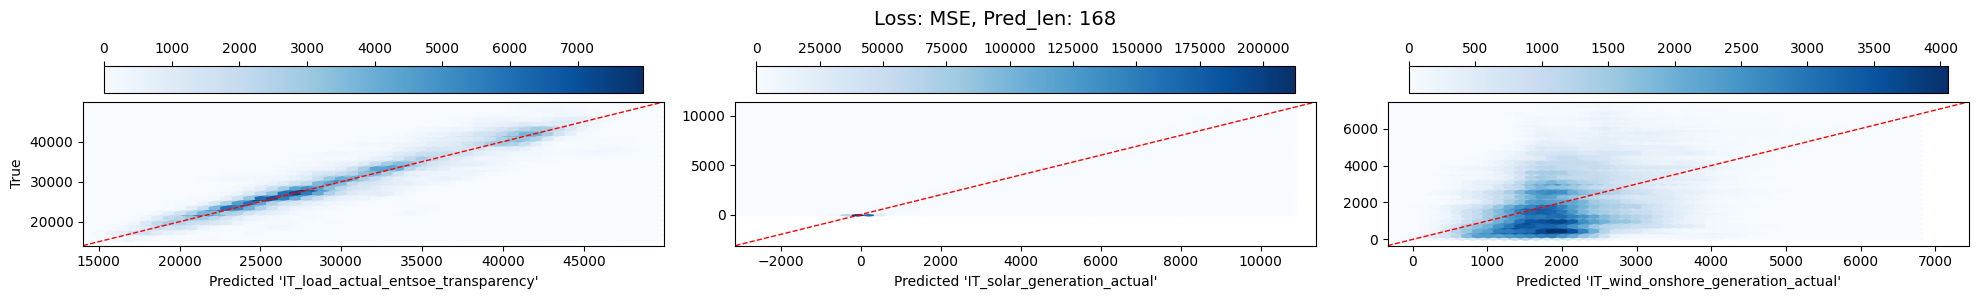

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [7]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE"]):
        plot_error_results("PatchTST", loss, seq_len=336, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled_IT", dataset="IT")
    print("-"*160)

# 4. MinMax Informer plots

load actual          min value: 15334.00   max value: 50505.33   negative values:       0.00%
solar generation     min value: 0.00       max value: 11679.95   negative values:       0.00%
wind onshore         min value: 21.60      max value: 7448.00    negative values:       0.00%


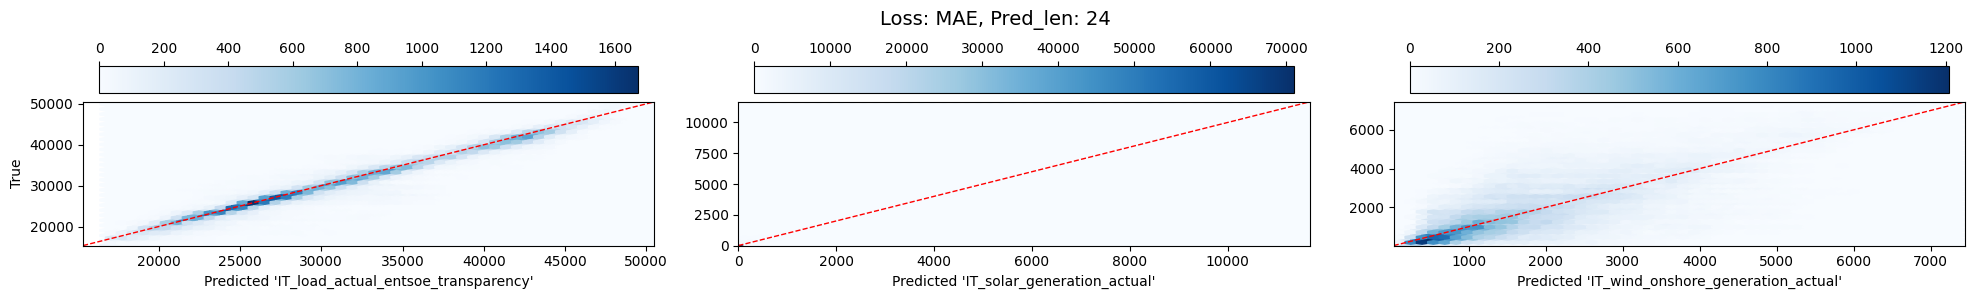

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


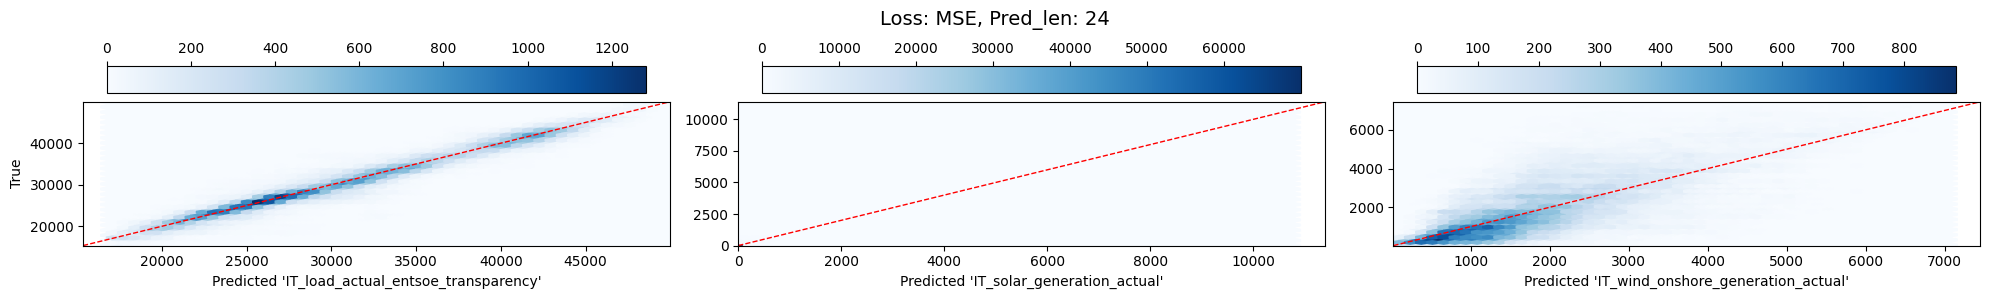

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 50090.97   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


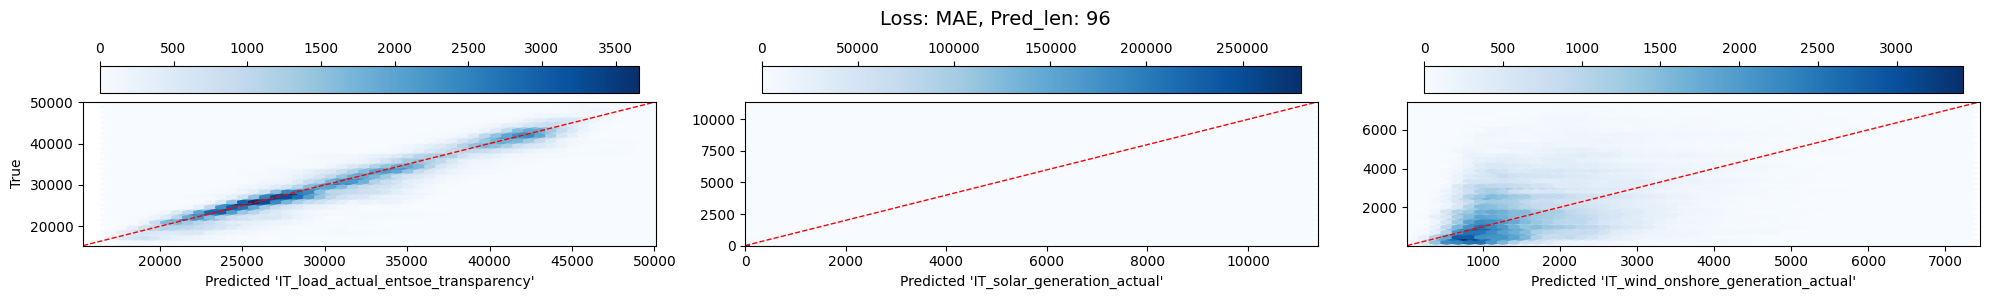

load actual          min value: 15334.00   max value: 52858.67   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


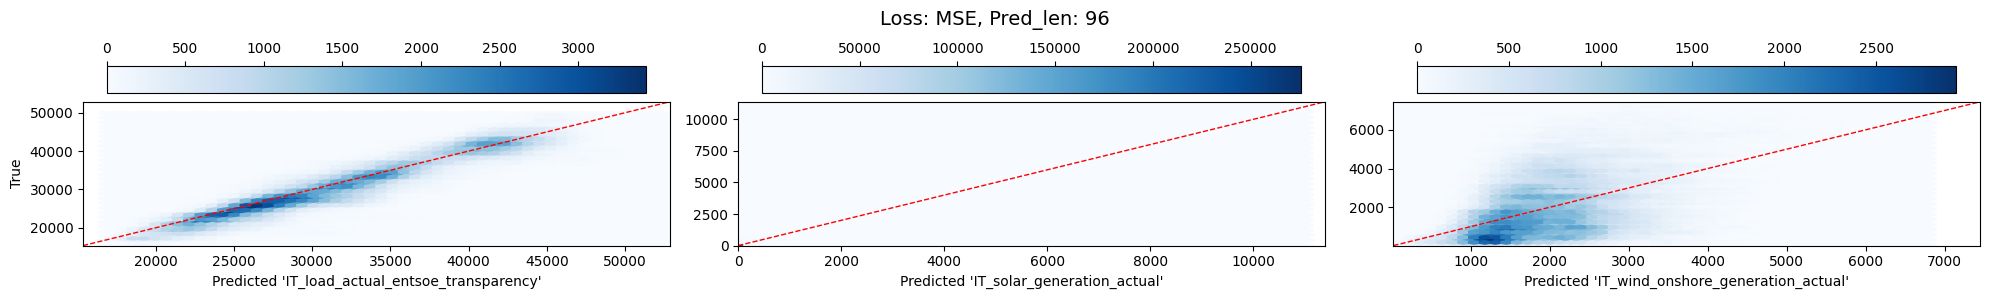

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 51552.33   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 50.00      max value: 7619.41    negative values:       0.00%


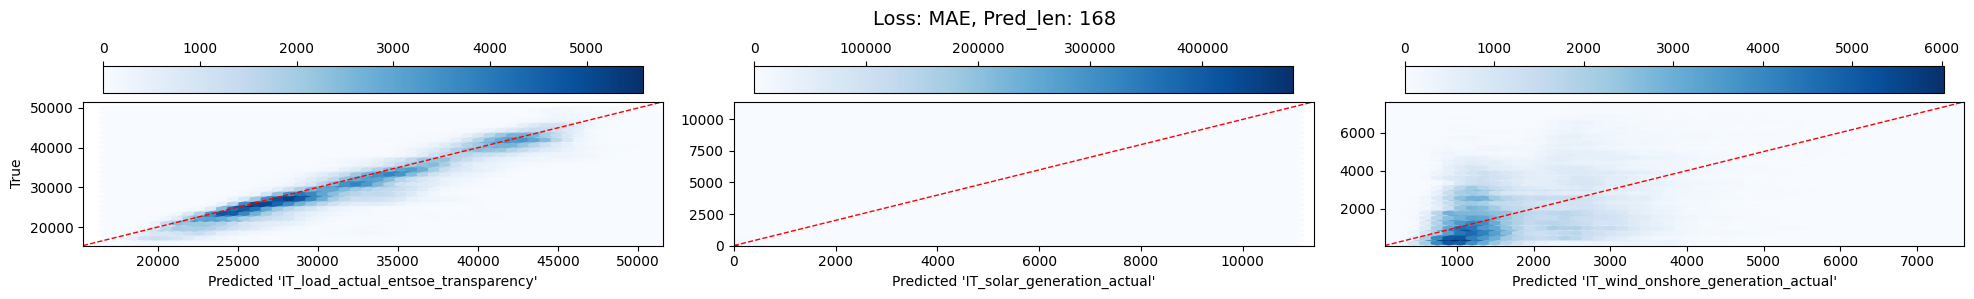

load actual          min value: 15334.00   max value: 53061.04   negative values:       0.00%
solar generation     min value: 0.00       max value: 11678.81   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


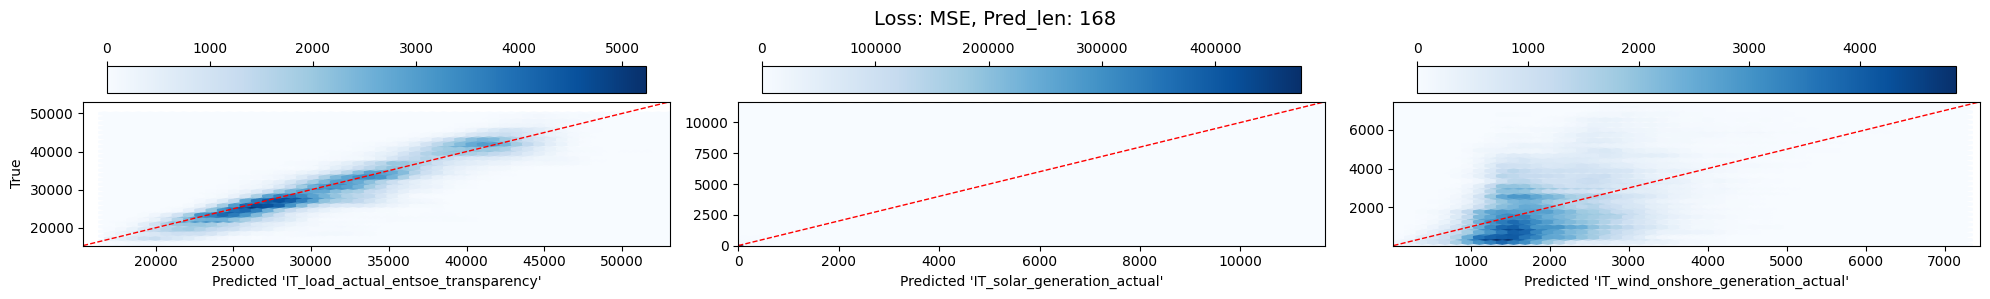

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_IT', dataset="IT")
    print("-"*160)


# 5. MinMax PatchTST plots

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


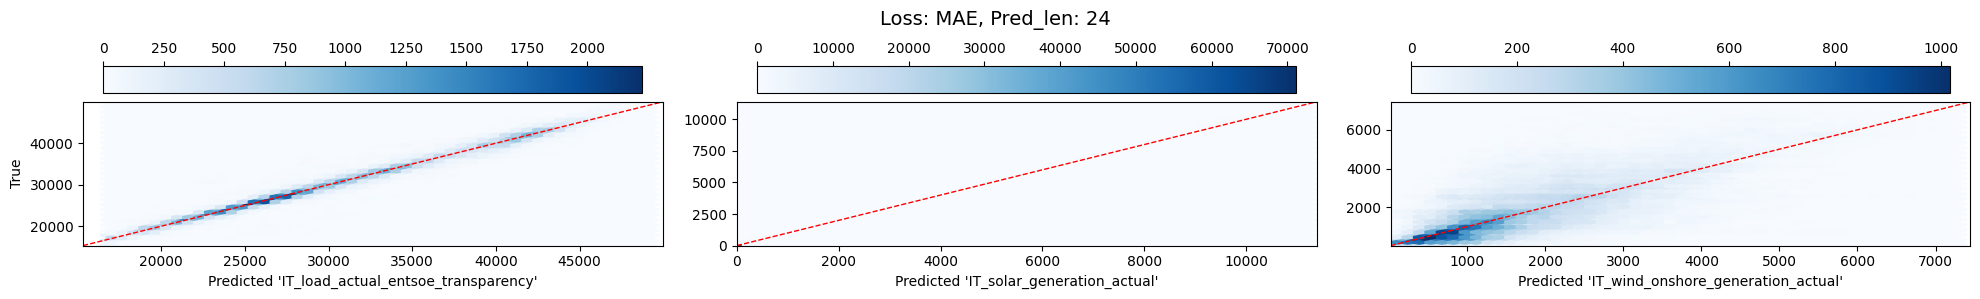

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


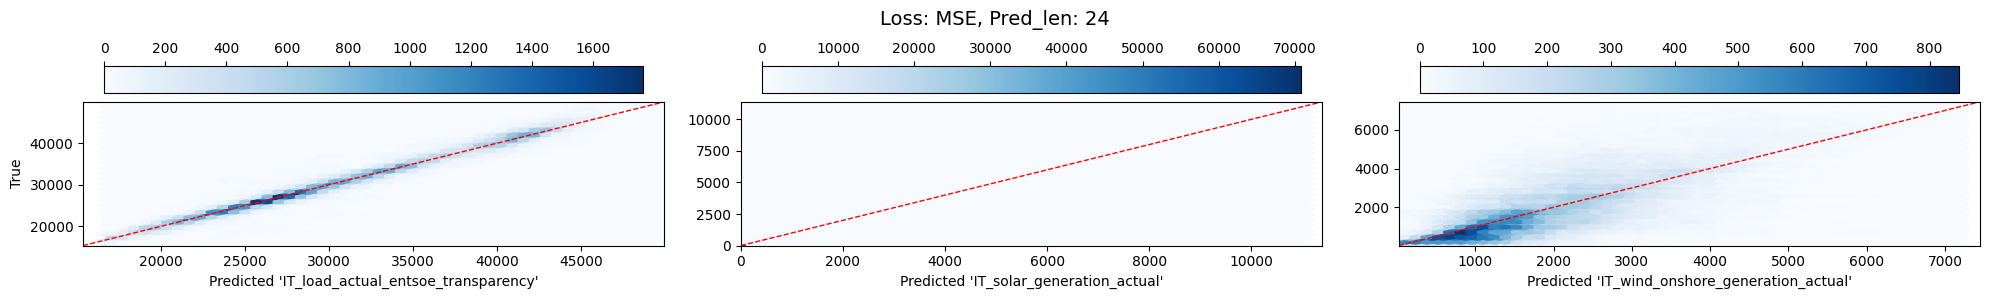

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


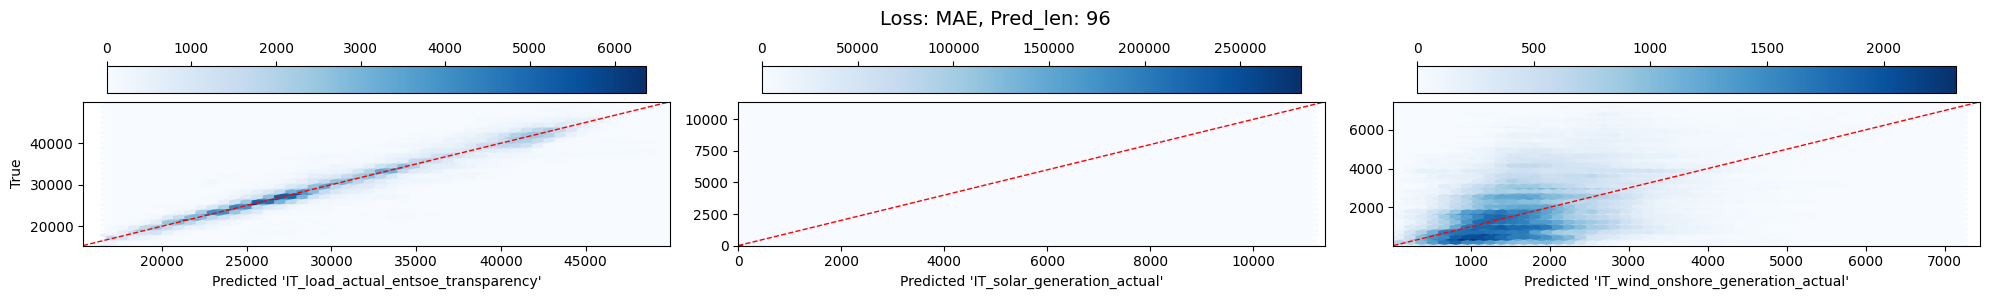

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


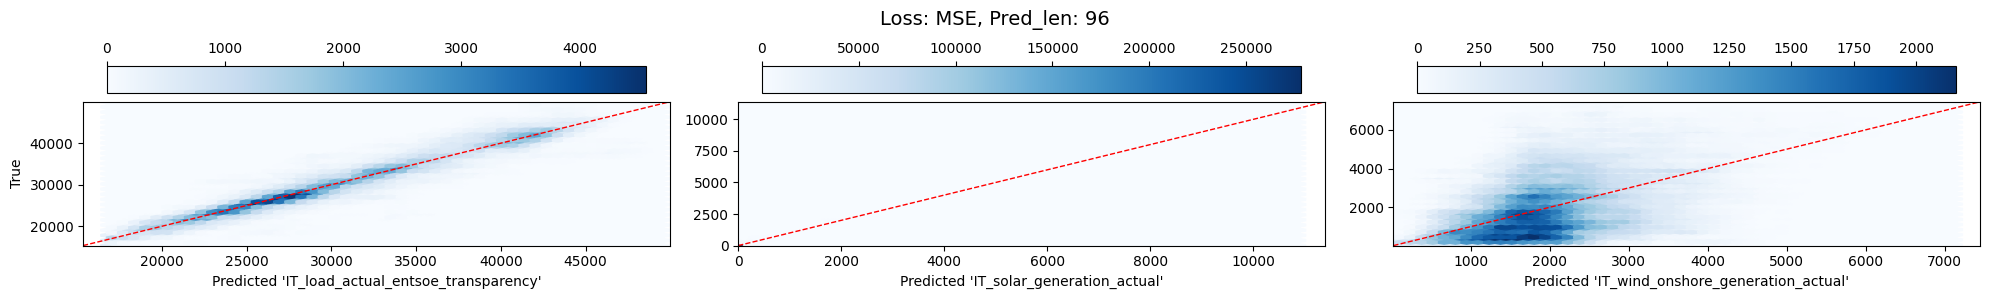

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 50333.60   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


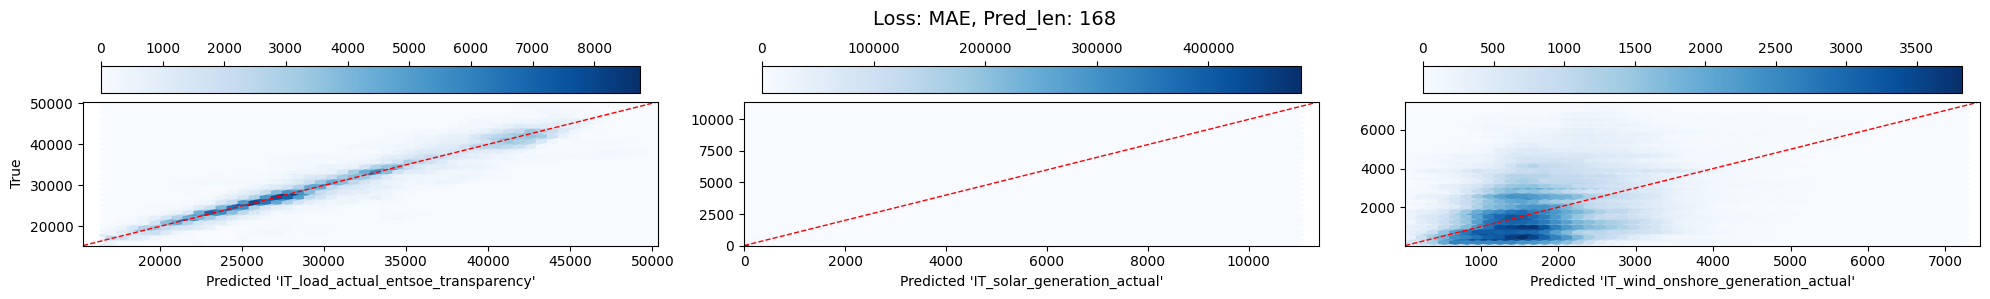

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: 0.00       max value: 11389.00   negative values:       0.00%
wind onshore         min value: 20.00      max value: 7448.00    negative values:       0.00%


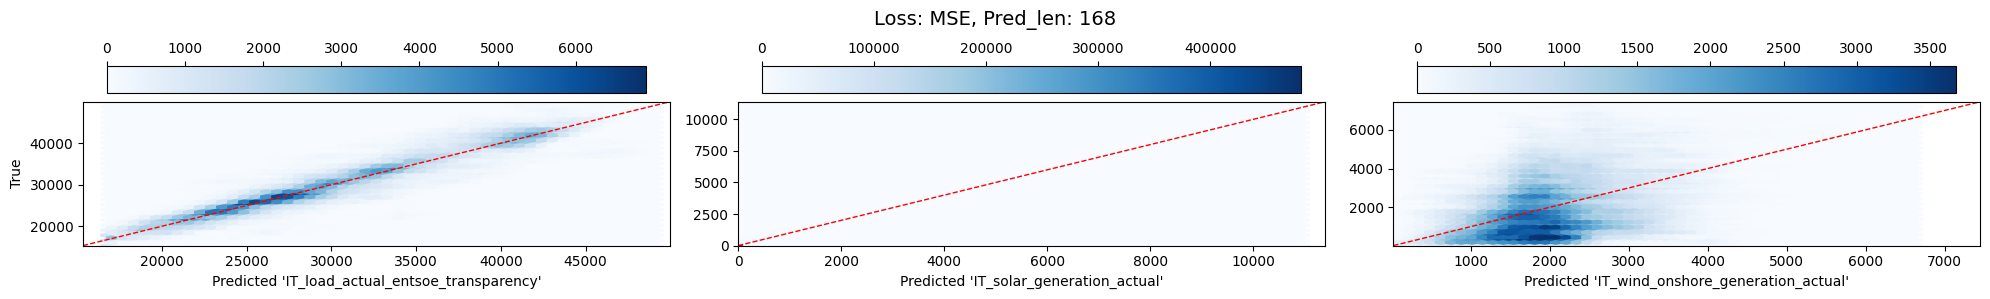

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [10]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE"]):
        plot_error_results("PatchTST", loss, seq_len=336, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_IT', dataset="IT")
    print("-"*160)

In [11]:
# Delete the folders
shutil.rmtree("minmax_IT")
shutil.rmtree("standard_unscaled_IT")
#shutil.rmtreee("logs")